In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%run ./'01 load.ipynb'

Last data for germany: 2020-04-15 14:46:44


In [3]:
country = 'Germany'

In [4]:
df = df[df['country'] == country]

In [5]:
interesting = ['date', 'date_string', 'confirmed', 'deaths', 'recovered', 'active']
df = df[interesting]

In [6]:
df['growth'] = df['confirmed'].diff().fillna(0)

In [7]:
curr = df.tail(1)['date'].dt.strftime('%d. %b, %H:%M Uhr').values[0]

In [8]:
# Newest data
df.tail(10)

,date,date_string,confirmed,deaths,recovered,active,growth
5600,2020-04-06 23:59:59,06. Apr,"103,374","1,810",0,0,"3,251"
5601,2020-04-07 23:59:59,07. Apr,"107,663","2,016",0,0,"4,289"
5602,2020-04-08 23:59:59,08. Apr,"113,296","2,349",0,0,"5,633"
5603,2020-04-09 23:59:59,09. Apr,"118,181","2,607",0,0,"4,885"
5604,2020-04-10 23:59:59,10. Apr,"122,171","2,767",0,0,"3,990"
5605,2020-04-11 23:59:59,11. Apr,"124,908","2,736",0,0,"2,737"
5606,2020-04-12 23:59:59,12. Apr,"127,854","3,022",0,0,"2,946"
5607,2020-04-13 23:59:59,13. Apr,"130,072","3,194",0,0,"2,218"
5608,2020-04-14 23:59:59,14. Apr,"131,359","3,294",0,0,"1,287"
5609,2020-04-15 14:46:44,15. Apr,"132,553","3,528","72,600","56,425","1,194"


In [9]:
# Load predictions from 18th march
prediction = pd.read_csv('20200318 Predict Corona - Sheet1.csv')
prediction['predict'] = prediction['predict'].str.replace(',','').astype('str')
prediction['date'] = prediction['date'] + ' 23:59:59'
prediction['date'] = pd.to_datetime(prediction['date'])
prediction['date_string'] = prediction['date'].dt.strftime('%d. %b')

In [10]:
df = pd.merge(left=df, right=prediction[['date', 'predict']], on='date', how='left')

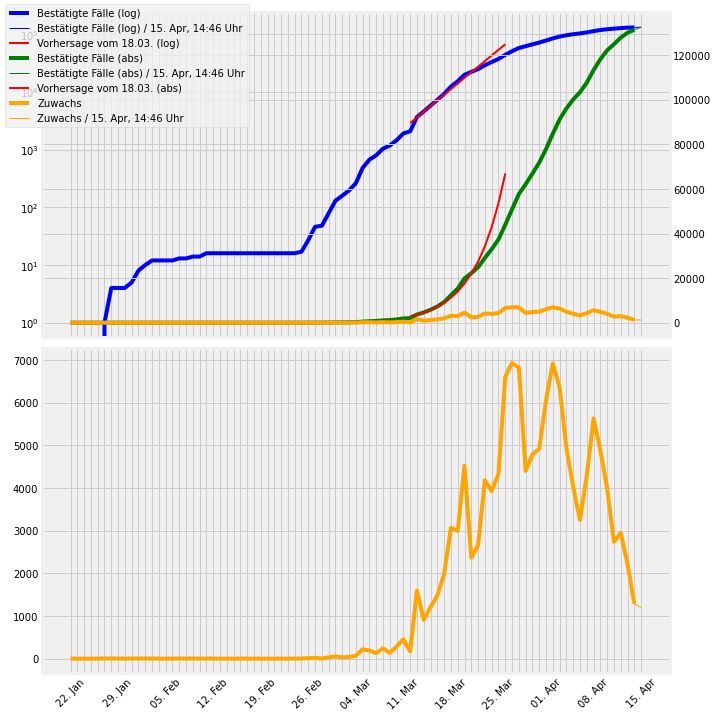

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax1.grid(True)
ax1.set_yscale('log')
ax1.plot(df['date_string'][:-1], df['confirmed'][:-1], color = 'blue', linewidth=4)
ax1.plot(df['date_string'][-2:], df['confirmed'][-2:], color = 'blue', linewidth=1)
ax1.plot(df['date_string'], df['predict'], color = 'red', linewidth=2)
ax2 = ax1.twinx()
ax2.plot(df['date_string'][:-1], df['confirmed'][:-1], color = 'green', linewidth=4)
ax2.plot(df['date_string'][-2:], df['confirmed'][-2:], color = 'green', linewidth=1)
ax2.plot(df['date_string'], df['predict'], color = 'red', linewidth=2)
ax2.plot(df['date_string'][:-1], df['growth'][:-1], color = 'orange', linewidth=4)
ax2.plot(df['date_string'][-2:], df['growth'][-2:], color = 'orange', linewidth=1)
fig.legend([
    'Bestätigte Fälle (log)',
    'Bestätigte Fälle (log) / ' + curr,
    'Vorhersage vom 18.03. (log)',
    'Bestätigte Fälle (abs)',
    'Bestätigte Fälle (abs) / ' + curr,
    'Vorhersage vom 18.03. (abs)',
    'Zuwachs',
    'Zuwachs / ' + curr], loc='upper left')
ax1.set_xticklabels(labels=df['date_string'], rotation=45)
ax3 = fig.add_subplot(2,1,2)
ax3.plot(df['date_string'][:-1], df['growth'][:-1], color = 'orange', linewidth=4)
ax3.plot(df['date_string'][-2:], df['growth'][-2:], color = 'orange', linewidth=1)
ax1.set_xticklabels([])
ax3.set_xticklabels(labels=df['date_string'], rotation=45)
labels = ax3.xaxis.get_ticklabels()
for label in labels:
    label.set_visible(False)
for label in labels[::7]:
    label.set_visible(True)
fig.tight_layout()
fig.show()